![](https://www.ieseg.fr/wp-content/uploads/IESEG-Logo-2012-rgb.jpg)

### By - Nithesh Ramanna

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from numpy import sqrt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the machine_failure.csv
data_df = pd.read_csv("./Data/machine_failure.csv")

In [3]:
#data_df information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [4]:
data_df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [5]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
data_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [7]:
data_df.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [8]:
#Encoding the Type of Machine as it is a categorical variable using sklearn package
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data_df['Types_Cat'] = labelencoder.fit_transform(data_df['Type'])

In [9]:
data_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Types_Cat
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,2
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,2
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,2
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0


In [10]:
#Total Machice failure incidences
len(data_df[data_df['Machine failure']==1])

339

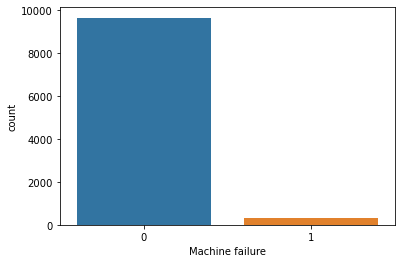

In [11]:
#Plotting the bar plot to check number of Machine failue incidences
ax = sns.countplot(x='Machine failure', data=data_df)

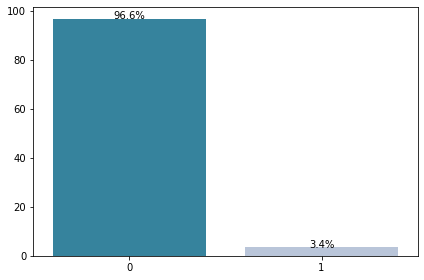

In [12]:
#Plotting the bar plot to check percentage of Machine failue incidences
plt.rcParams["figure.autolayout"] = True
x = [0,1]
per_1 = sum(data_df['Machine failure'])*100/len(data_df)
y = [100-per_1, per_1]
percentage = [100-per_1, per_1]
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

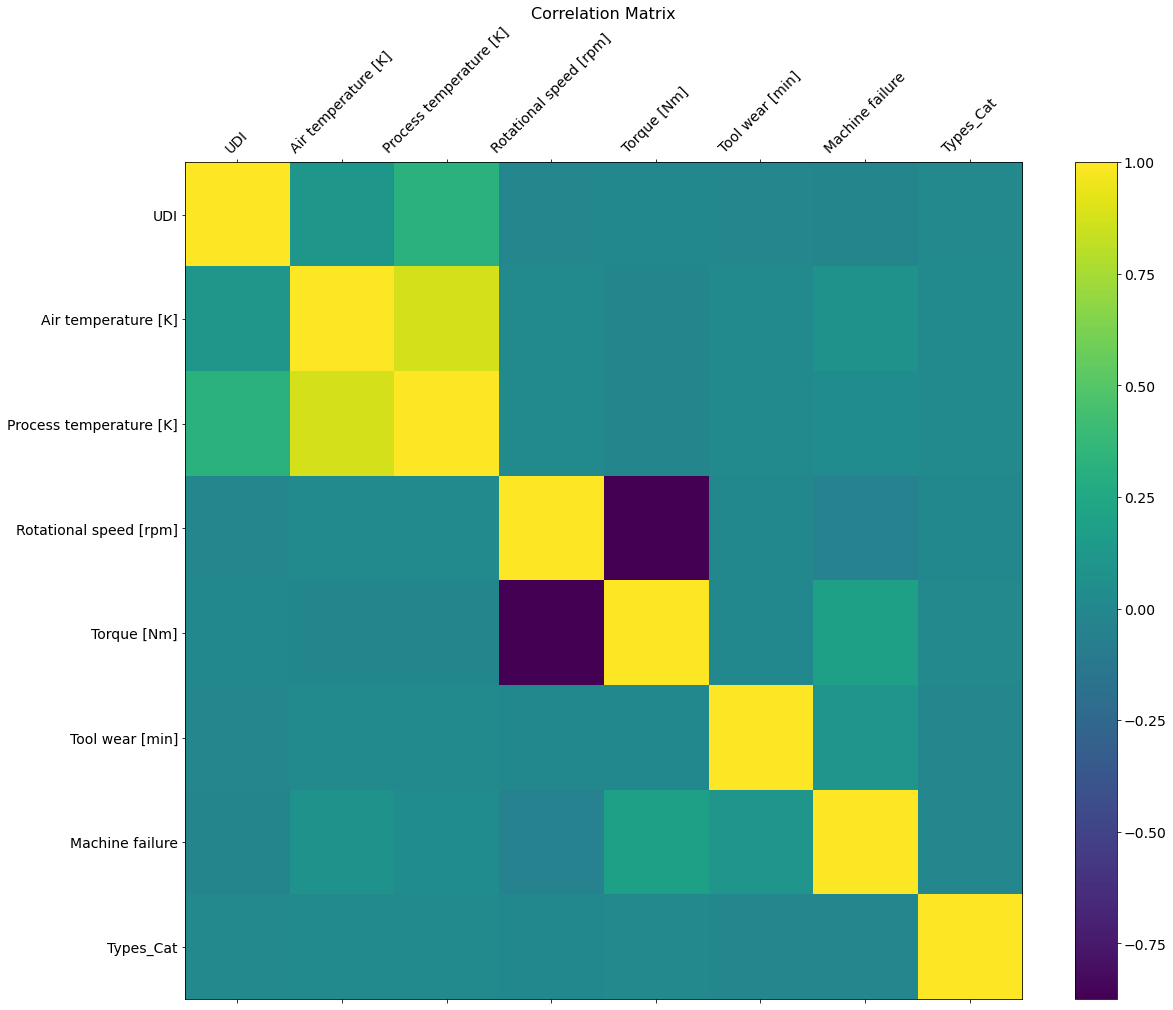

In [13]:
#Plotting the correlation matrix using seaborn package
f = plt.figure(figsize=(19, 15))
plt.matshow(data_df.corr(), fignum=f.number)
plt.xticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<AxesSubplot:>

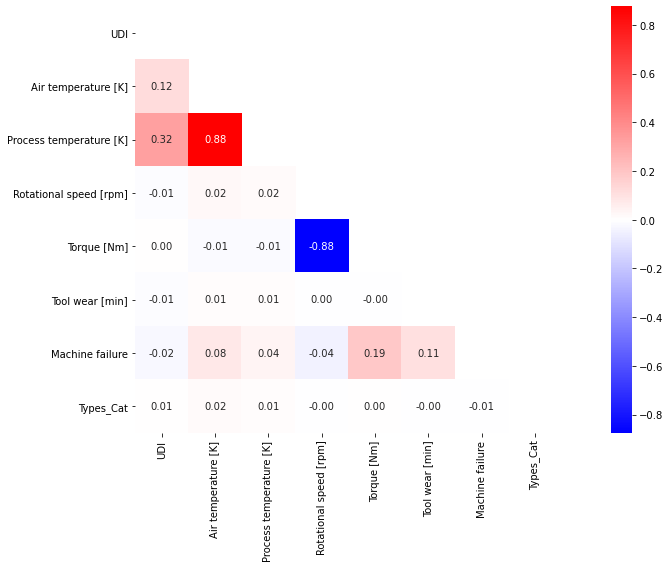

In [14]:
# Compute the correlation matrix
corr = data_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(14,8))
sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)

Looking at the correlation matrix, there is a high positive correlation between Air temperature and Process Temperature and Torque and Rotational speed have negative correlation

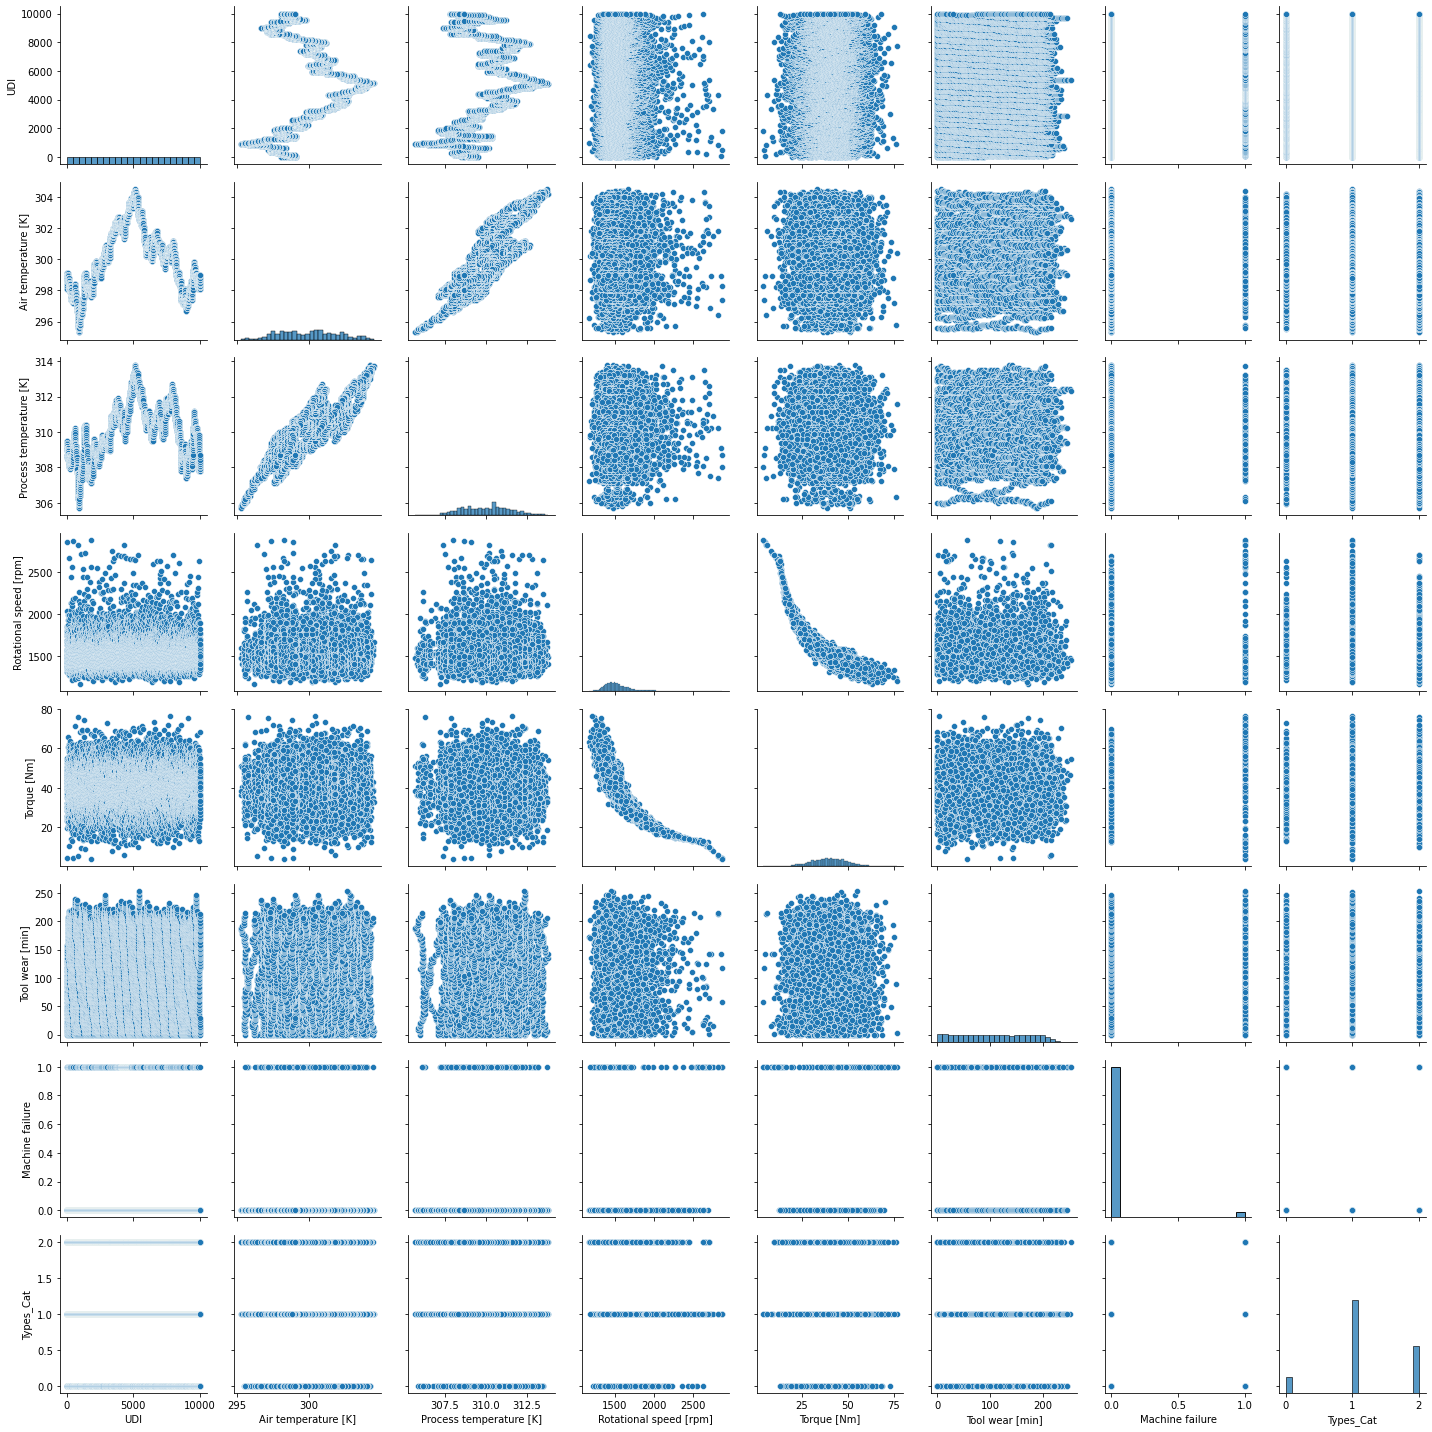

In [15]:
sns.pairplot(data_df)

Looking at the pair plots, we can say  Air temperature and Process Temperature, Torque and Rotational speed have correlation rest all combinations are not giving any insights from the pair plot

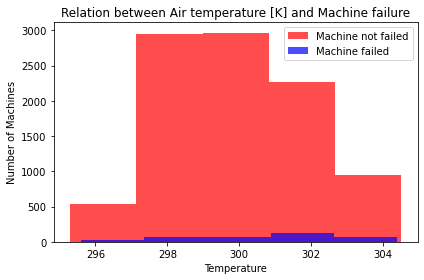

In [16]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(data_df[data_df['Machine failure'] == 0]['Air temperature [K]'], bins=5, color='Red', alpha=0.7, label='Machine not failed')
ax.hist(data_df[data_df['Machine failure'] == 1]['Air temperature [K]'], bins=5, color='Blue', alpha=0.7, label='Machine failed')
ax.set_title('Relation between Air temperature [K] and Machine failure')
ax.set_xlabel('Temperature')
ax.set_ylabel('Number of Machines')
ax.legend()

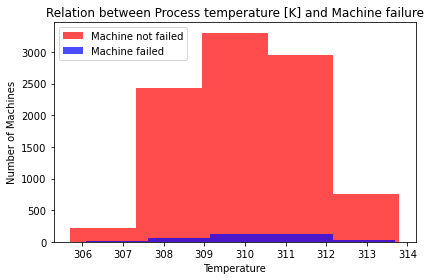

In [17]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(data_df[data_df['Machine failure'] == 0]['Process temperature [K]'], bins=5, color='Red', alpha=0.7, label='Machine not failed')
ax.hist(data_df[data_df['Machine failure'] == 1]['Process temperature [K]'], bins=5, color='Blue', alpha=0.7, label='Machine failed')
ax.set_title('Relation between Process temperature [K] and Machine failure')
ax.set_xlabel('Temperature')
ax.set_ylabel('Number of Machines')
ax.legend()

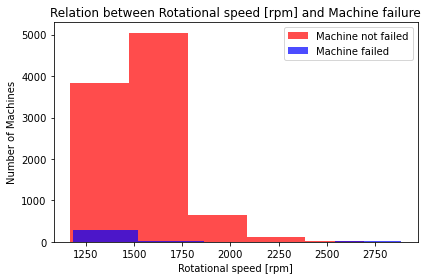

In [18]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(data_df[data_df['Machine failure'] == 0]['Rotational speed [rpm]'], bins=5, color='Red', alpha=0.7, label='Machine not failed')
ax.hist(data_df[data_df['Machine failure'] == 1]['Rotational speed [rpm]'], bins=5, color='Blue', alpha=0.7, label='Machine failed')
ax.set_title('Relation between Rotational speed [rpm] and Machine failure')
ax.set_xlabel('Rotational speed [rpm]')
ax.set_ylabel('Number of Machines')
ax.legend()

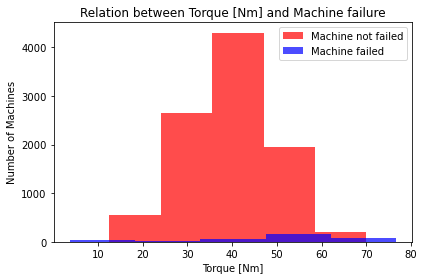

In [19]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(data_df[data_df['Machine failure'] == 0]['Torque [Nm]'], bins=5, color='Red', alpha=0.7, label='Machine not failed')
ax.hist(data_df[data_df['Machine failure'] == 1]['Torque [Nm]'], bins=5, color='Blue', alpha=0.7, label='Machine failed')
ax.set_title('Relation between Torque [Nm] and Machine failure')
ax.set_xlabel('Torque [Nm]')
ax.set_ylabel('Number of Machines')
ax.legend()

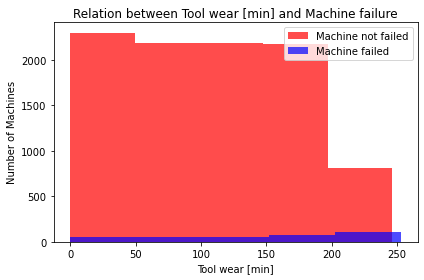

In [20]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(data_df[data_df['Machine failure'] == 0]['Tool wear [min]'], bins=5, color='Red', alpha=0.7, label='Machine not failed')
ax.hist(data_df[data_df['Machine failure'] == 1]['Tool wear [min]'], bins=5, color='Blue', alpha=0.7, label='Machine failed')
ax.set_title('Relation between Tool wear [min] and Machine failure')
ax.set_xlabel('Tool wear [min]')
ax.set_ylabel('Number of Machines')
ax.legend()

<AxesSubplot:xlabel='Machine failure', ylabel='Air temperature [K]'>

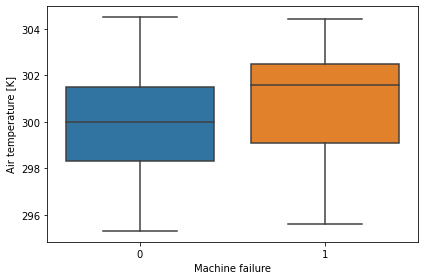

In [21]:
sns.boxplot(x="Machine failure", y="Air temperature [K]", data=data_df)

<AxesSubplot:xlabel='Machine failure', ylabel='Process temperature [K]'>

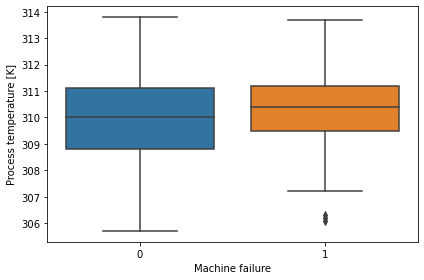

In [22]:
sns.boxplot(x="Machine failure", y="Process temperature [K]", data=data_df)

<AxesSubplot:xlabel='Machine failure', ylabel='Rotational speed [rpm]'>

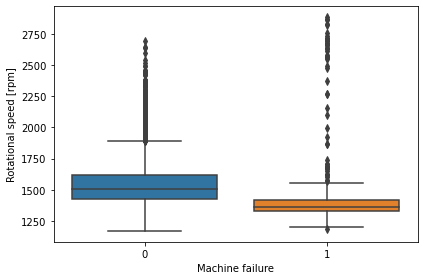

In [23]:
sns.boxplot(x="Machine failure", y="Rotational speed [rpm]", data=data_df)

<AxesSubplot:xlabel='Machine failure', ylabel='Torque [Nm]'>

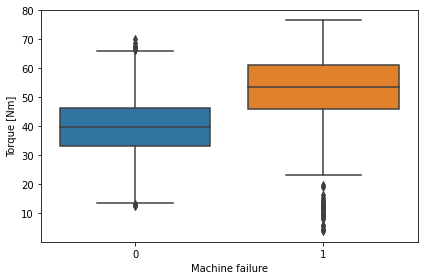

In [24]:
sns.boxplot(x="Machine failure", y="Torque [Nm]", data=data_df)

<AxesSubplot:xlabel='Machine failure', ylabel='Tool wear [min]'>

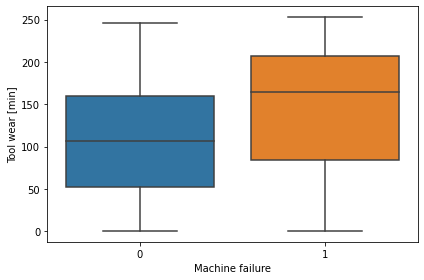

In [25]:
sns.boxplot(x="Machine failure", y='Tool wear [min]', data=data_df)

Looking at the boxplots, lower values Rotational speed [rpm] have impact on machine failure, upper values for Torque [Nm] have impact on machine failure.

## Split the data

In [26]:
#Select all the columns except the UID and ProductID
columns = ['Tool wear [min]', "Torque [Nm]","Rotational speed [rpm]","Air temperature [K]","Process temperature [K]", 'Types_Cat']
# split data in train and test
X, y = data_df[columns], data_df["Machine failure"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state=52)

print('Number of Machine Failures in Train:', y_train.sum())
print('Number of Machine Failures in test :', y_test.sum())

Number of Machine Failures in Train: 237
Number of Machine Failures in test : 102


In [27]:
X_train.head()

,Tool wear [min],Torque [Nm],Rotational speed [rpm],Air temperature [K],Process temperature [K],Types_Cat
4014,182,30.8,1740,302.1,311.0,1
6693,33,26.7,1756,301.8,311.0,2
9264,20,36.9,1526,298.3,309.0,2
7420,201,40.0,1547,300.1,311.3,1
6739,154,43.6,1482,301.7,311.2,1


# Logistic Regression

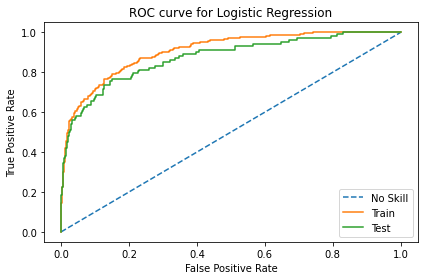

Best Threshold for Test= 0.040175
Train:	ACC=0.8521
Test:	ACC=0.8467
Train:	AUC=0.8156
Test:	AUC=0.8024


In [29]:
# fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict
pred_train = logreg.predict_proba(X_train)[:,1]
pred_test = logreg.predict_proba(X_test)[:,1]

pred_train_df = pd.DataFrame(pred_train)
pred_test_df = pd.DataFrame(pred_test)

# Calculating the best threshold with ROC curves
# # calculate roc curves
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)

# # calculate the geometric-mean for each threshold
gmeans_train = sqrt(tpr_train * (1-fpr_train))
gmeans_test = sqrt(tpr_test * (1-fpr_test))

# # locate the index of the largest g-mean
ix_train = np.argmax(gmeans_train)
ix_test = np.argmax(gmeans_test)

# # plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_train, tpr_train, linestyle='-', label='Train')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')

# # axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend()
# # show the plot
plt.show()

print('Best Threshold for Test= %f' % (thresholds_test[ix_test]))

# #using the best test threshold to classify the machine failure 
Y_train_pred = pred_train_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)
Y_test_pred = pred_test_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)

# # # Confusion matrix for train and test predictions
cf_matrix_train = confusion_matrix(y_train, Y_train_pred)
cf_matrix_test = confusion_matrix(y_test, Y_test_pred)


# # # evaluate predictions
acc_train = accuracy_score(y_train, np.round(Y_train_pred))
acc_test = accuracy_score(y_test, np.round(Y_test_pred))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

# # AUC scores for both test and train
auc_train = roc_auc_score(y_train, np.round(Y_train_pred))
auc_test = roc_auc_score(y_test, np.round(Y_test_pred))

print(f"Train:\tAUC={auc_train:.4f}")
print(f"Test:\tAUC={auc_test:.4f}")

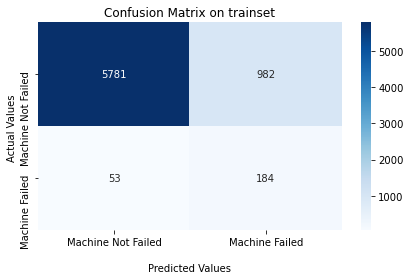

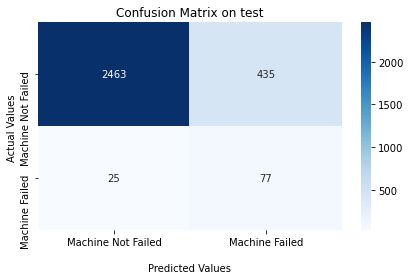

In [30]:
#Confusion Matrix for train
ax = sns.heatmap(cf_matrix_train, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on trainset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Confusion Matrix for test
ax = sns.heatmap(cf_matrix_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on test');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Decision Tree

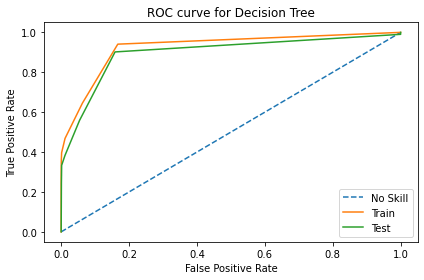

Best Threshold for Test= 0.090439
Train:	ACC=0.9274
Test:	ACC=0.9327
Train:	AUC=0.7914
Test:	AUC=0.7523


In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# define model
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)
# predict
pred_train = tree.predict_proba(X_train)[:,1]
pred_test = tree.predict_proba(X_test)[:,1]

pred_train_df = pd.DataFrame(pred_train)
pred_test_df = pd.DataFrame(pred_test)

# Calculating the best threshold with ROC curves
# # calculate roc curves
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)

# # calculate the geometric-mean for each threshold
gmeans_train = sqrt(tpr_train * (1-fpr_train))
gmeans_test = sqrt(tpr_test * (1-fpr_test))

# # locate the index of the largest g-mean
ix_train = np.argmax(gmeans_train)
ix_test = np.argmax(gmeans_test)

# # plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_train, tpr_train, linestyle='-', label='Train')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')
# # axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.legend()
# # show the plot
plt.show()

print('Best Threshold for Test= %f' % (thresholds_test[ix_test]))

# #using the best test threshold to classify the machine failure 
Y_train_pred = pred_train_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)
Y_test_pred = pred_test_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)

# # # Confusion matrix for train and test predictions
cf_matrix_train = confusion_matrix(y_train, Y_train_pred)
cf_matrix_test = confusion_matrix(y_test, Y_test_pred)


# # # evaluate predictions
acc_train = accuracy_score(y_train, np.round(Y_train_pred))
acc_test = accuracy_score(y_test, np.round(Y_test_pred))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

# # AUC scores for both test and train
auc_train = roc_auc_score(y_train, np.round(Y_train_pred))
auc_test = roc_auc_score(y_test, np.round(Y_test_pred))

print(f"Train:\tAUC={auc_train:.4f}")
print(f"Test:\tAUC={auc_test:.4f}")

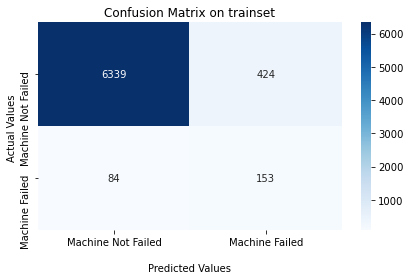

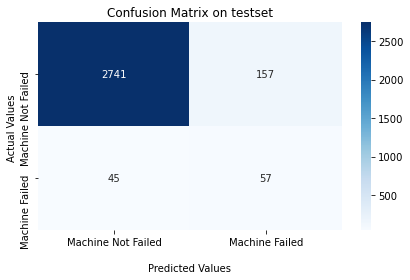

In [32]:
#Confusion Matrix for train
ax = sns.heatmap(cf_matrix_train, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on trainset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Confusion Matrix for test
ax = sns.heatmap(cf_matrix_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on testset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest

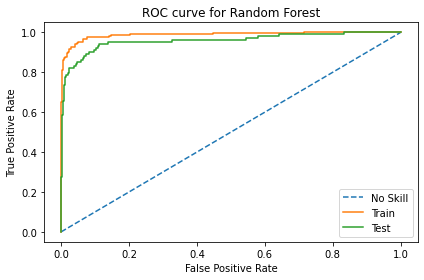

Best Threshold for Test= 0.035077
Train:	ACC=0.8869
Test:	ACC=0.8893
Train:	AUC=0.9313
Test:	AUC=0.9096


In [34]:
from sklearn.ensemble import RandomForestClassifier
# define random forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf.fit(X_train, y_train)
# predict
pred_train = rf.predict_proba(X_train)[:,1]
pred_test = rf.predict_proba(X_test)[:,1]

pred_train_df = pd.DataFrame(pred_train)
pred_test_df = pd.DataFrame(pred_test)

# Calculating the best threshold with ROC curves
# # calculate roc curves
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)

# # calculate the geometric-mean for each threshold
gmeans_train = sqrt(tpr_train * (1-fpr_train))
gmeans_test = sqrt(tpr_test * (1-fpr_test))

# # locate the index of the largest g-mean
ix_train = np.argmax(gmeans_train)
ix_test = np.argmax(gmeans_test)

# # plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_train, tpr_train, linestyle='-', label='Train')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')
# # axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend()
# # show the plot
plt.show()

print('Best Threshold for Test= %f' % (thresholds_test[ix_test]))

# #using the best test threshold to classify the machine failure 
Y_train_pred = pred_train_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)
Y_test_pred = pred_test_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)

# # # Confusion matrix for train and test predictions
cf_matrix_train = confusion_matrix(y_train, Y_train_pred)
cf_matrix_test = confusion_matrix(y_test, Y_test_pred)


# # # evaluate predictions
acc_train = accuracy_score(y_train, np.round(Y_train_pred))
acc_test = accuracy_score(y_test, np.round(Y_test_pred))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

# # AUC scores for both test and train
auc_train = roc_auc_score(y_train, np.round(Y_train_pred))
auc_test = roc_auc_score(y_test, np.round(Y_test_pred))

print(f"Train:\tAUC={auc_train:.4f}")
print(f"Test:\tAUC={auc_test:.4f}")

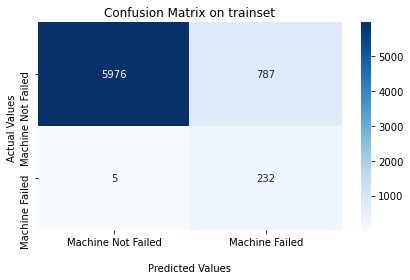

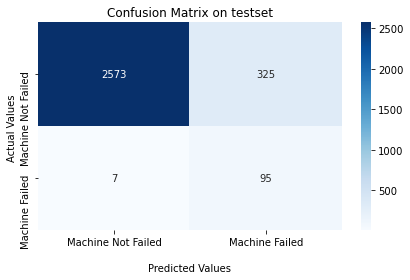

In [35]:
#Confusion Matrix for train
ax = sns.heatmap(cf_matrix_train, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on trainset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Confusion Matrix for test
ax = sns.heatmap(cf_matrix_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on testset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Neural Network

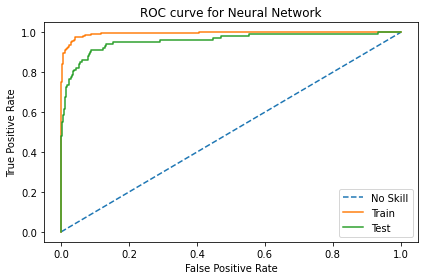

Best Threshold for Test= 0.005908
Train:	ACC=0.9019
Test:	ACC=0.9117
Train:	AUC=0.9451
Test:	AUC=0.9070


In [37]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# normalize data (can help the NN to converge)
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), batch_size=32, early_stopping=False, random_state=42)
mlp.fit(X_train_transformed, y_train)
# predict
pred_train = mlp.predict_proba(X_train_transformed)[:,1]
pred_test = mlp.predict_proba(X_test_transformed)[:,1]

pred_train_df = pd.DataFrame(pred_train)
pred_test_df = pd.DataFrame(pred_test)

# Calculating the best threshold with ROC curves
# # calculate roc curves
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)

# # calculate the geometric-mean for each threshold
gmeans_train = sqrt(tpr_train * (1-fpr_train))
gmeans_test = sqrt(tpr_test * (1-fpr_test))

# # locate the index of the largest g-mean
ix_train = np.argmax(gmeans_train)
ix_test = np.argmax(gmeans_test)

# # plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_train, tpr_train, linestyle='-', label='Train')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')
# # axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Neural Network')
plt.legend()
# # show the plot
plt.show()

print('Best Threshold for Test= %f' % (thresholds_test[ix_test]))

# #using the best test threshold to classify the machine failure 
Y_train_pred = pred_train_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)
Y_test_pred = pred_test_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)

# # # Confusion matrix for train and test predictions
cf_matrix_train = confusion_matrix(y_train, Y_train_pred)
cf_matrix_test = confusion_matrix(y_test, Y_test_pred)


# # # evaluate predictions
acc_train = accuracy_score(y_train, np.round(Y_train_pred))
acc_test = accuracy_score(y_test, np.round(Y_test_pred))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

# # AUC scores for both test and train
auc_train = roc_auc_score(y_train, np.round(Y_train_pred))
auc_test = roc_auc_score(y_test, np.round(Y_test_pred))

print(f"Train:\tAUC={auc_train:.4f}")
print(f"Test:\tAUC={auc_test:.4f}")

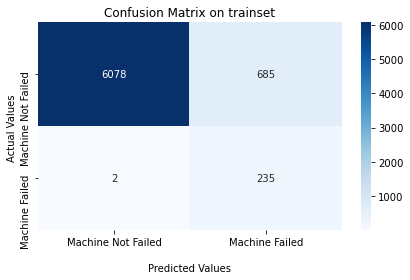

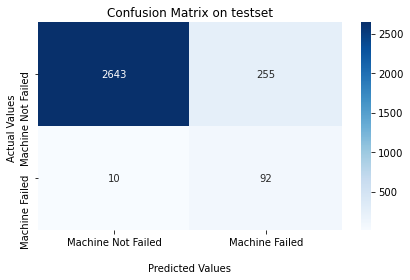

In [38]:
#Confusion Matrix for train
ax = sns.heatmap(cf_matrix_train, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on trainset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Confusion Matrix for test
ax = sns.heatmap(cf_matrix_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on testset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Gradient Boosting Classifier

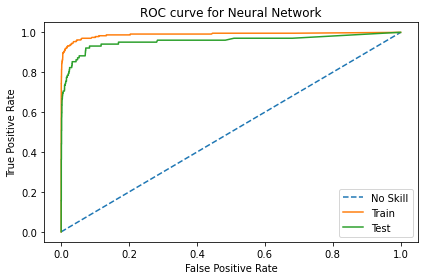

Best Threshold for Test= 0.024900
Train:	ACC=0.9200
Test:	ACC=0.9270
Train:	AUC=0.9443
Test:	AUC=0.9197


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
# predict
pred_train = boosting.predict_proba(X_train)[:,1]
pred_test = boosting.predict_proba(X_test)[:,1]

pred_train_df = pd.DataFrame(pred_train)
pred_test_df = pd.DataFrame(pred_test)

# Calculating the best threshold with ROC curves
# # calculate roc curves
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)

# # calculate the geometric-mean for each threshold
gmeans_train = sqrt(tpr_train * (1-fpr_train))
gmeans_test = sqrt(tpr_test * (1-fpr_test))

# # locate the index of the largest g-mean
ix_train = np.argmax(gmeans_train)
ix_test = np.argmax(gmeans_test)

# # plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_train, tpr_train, linestyle='-', label='Train')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')
# # axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gradient Boosting')
plt.legend()
# # show the plot
plt.show()

print('Best Threshold for Test= %f' % (thresholds_test[ix_test]))

# #using the best test threshold to classify the machine failure 
Y_train_pred = pred_train_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)
Y_test_pred = pred_test_df.applymap(lambda x: 1 if x>thresholds_test[ix_test] else 0)

# # # Confusion matrix for train and test predictions
cf_matrix_train = confusion_matrix(y_train, Y_train_pred)
cf_matrix_test = confusion_matrix(y_test, Y_test_pred)


# # # evaluate predictions
acc_train = accuracy_score(y_train, np.round(Y_train_pred))
acc_test = accuracy_score(y_test, np.round(Y_test_pred))

print(f"Train:\tACC={acc_train:.4f}")
print(f"Test:\tACC={acc_test:.4f}")

# # AUC scores for both test and train
auc_train = roc_auc_score(y_train, np.round(Y_train_pred))
auc_test = roc_auc_score(y_test, np.round(Y_test_pred))

print(f"Train:\tAUC={auc_train:.4f}")
print(f"Test:\tAUC={auc_test:.4f}")

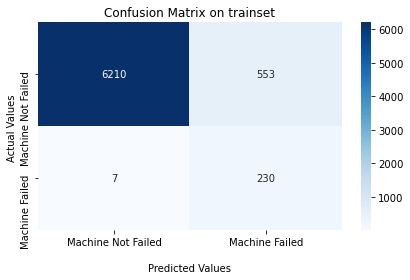

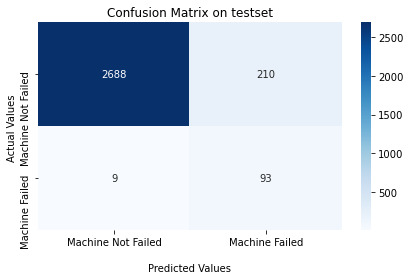

In [41]:
#Confusion Matrix for train
ax = sns.heatmap(cf_matrix_train, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on trainset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Confusion Matrix for test
ax = sns.heatmap(cf_matrix_test, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix on testset');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])
ax.yaxis.set_ticklabels(['Machine Not Failed','Machine Failed'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Interpritability Logistic regression

In [42]:
columns

['Tool wear [min]',
 'Torque [Nm]',
 'Rotational speed [rpm]',
 'Air temperature [K]',
 'Process temperature [K]',
 'Types_Cat']

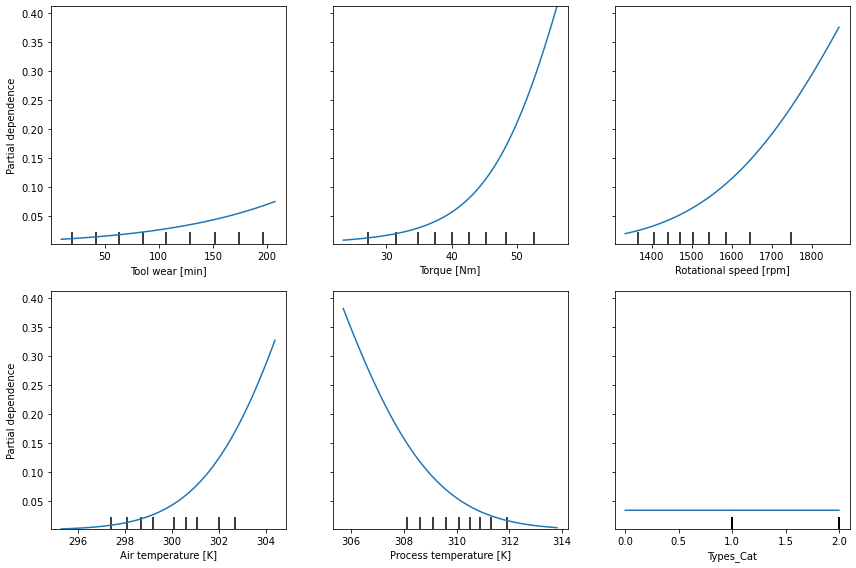

In [43]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(estimator=logreg, X=X_train, features=[0,1,2,3,4,5], ax=ax)
fig.tight_layout(pad=2.0)

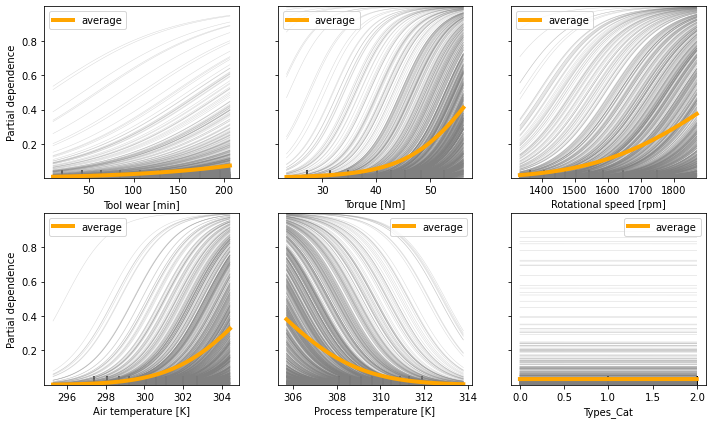

In [44]:
#ICE
fig, ax = plt.subplots(figsize=(10, 6))
ice = PartialDependenceDisplay.from_estimator(estimator=logreg,
                        X=X_train,
                        features=[0,1,2,3,4,5],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        # centered=True, # will be added in the future
                        ax=ax)
fig.tight_layout(pad=2.0)

In [45]:
import PyALE
# adapt PyALE.ale function to incorporate classification models 
def ale(target=None, print_meanres=False, **kwargs):
    if target is not None:
        class clf():
            def __init__(self, classifier):
                self.classifier = classifier
            def predict(self, X):
                return(self.classifier.predict_proba(X)[:, target])
        clf_dummy = clf(kwargs["model"])
        kwargs["model"] = clf_dummy
    if (print_meanres & len(kwargs["feature"])==1):
        mean_response = np.mean(kwargs["model"].predict(kwargs["X"]), axis=0)
        print(f"Mean response: {mean_response:.5f}")
    return PyALE.ale(**kwargs)

In [109]:
columns

['Tool wear [min]',
 'Torque [Nm]',
 'Rotational speed [rpm]',
 'Air temperature [K]',
 'Process temperature [K]',
 'Types_Cat']

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03387


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.


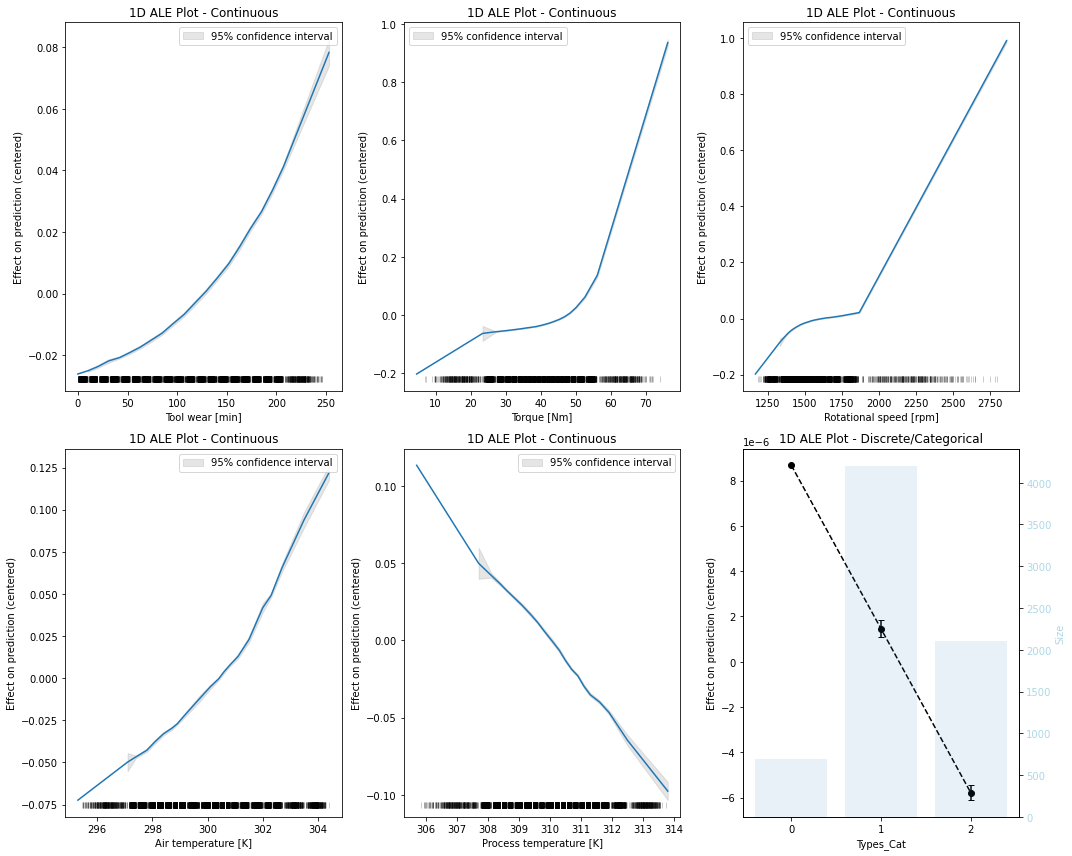

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.tight_layout(pad=3)


ale_tool_wear = ale(
        X=X_train,
        model=logreg,
        feature=['Tool wear [min]'],
        include_CI=True,
        target=i,
        fig=fig,
        ax=axs[0,0], print_meanres=True)

ale_torque = ale(
        X=X_train,
        model=logreg,
        feature=["Torque [Nm]"],
        include_CI=True,
        target=i,
        fig=fig,
        ax=axs[0,1])

ale_speed = ale(
        X=X_train,
        model=logreg,
        feature=["Rotational speed [rpm]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[0,2])

ale_air = ale(
        X=X_train,
        model=logreg,
        feature=["Air temperature [K]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,0])

ale_process = ale(
        X=X_train,
        model=logreg,
        feature=["Process temperature [K]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,1])

ale_Cat = ale(
        X=X_train,
        model=logreg,
        feature=["Types_Cat"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,2])

    
        
#     axs[i,0].set_title(iris.target_names[i])
#     axs[i,1].set_title(iris.target_names[i])
#     axs[i,2].set_title(iris.target_names[i])

In [49]:
import shap
shap.initjs()
# set up explainer for ".predict" method
explainer = shap.Explainer(logreg.predict, X_test)

# compute shap values
shap_values = explainer(X_test)

Exact explainer: 3001it [00:13, 71.10it/s]                                                                             


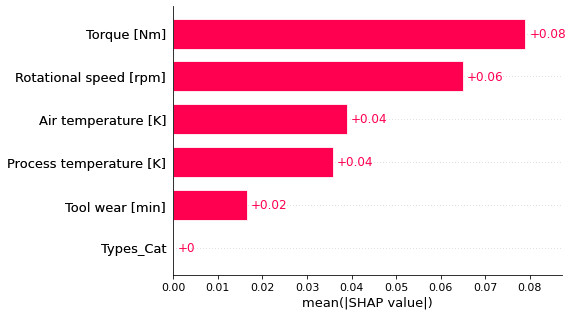

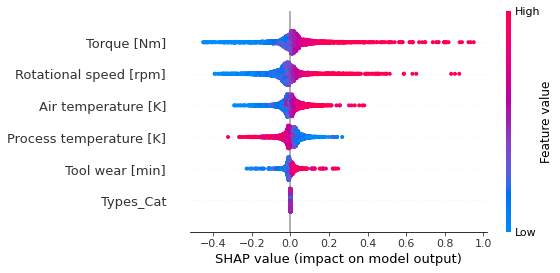

In [50]:
# feature importance (global)

# bar chart
shap.plots.bar(shap_values)

# individual dots for each instance
shap.plots.beeswarm(shap_values)

# Interpretability Random Forest

## Partial Dependece Plots

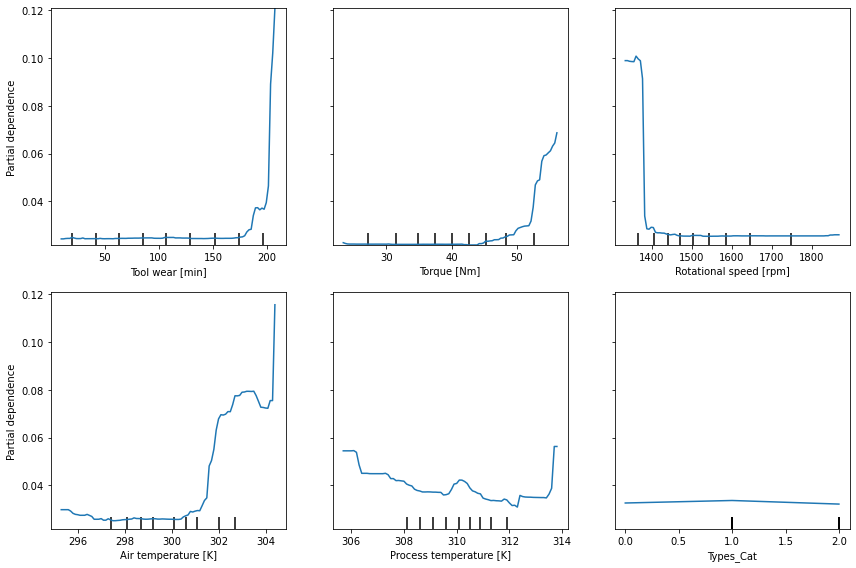

In [51]:
#PDP
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(estimator=rf, X=X_train, features=[0,1,2,3,4,5], ax=ax)
fig.tight_layout(pad=2.0)

## Individual Conditional Expectation Plots

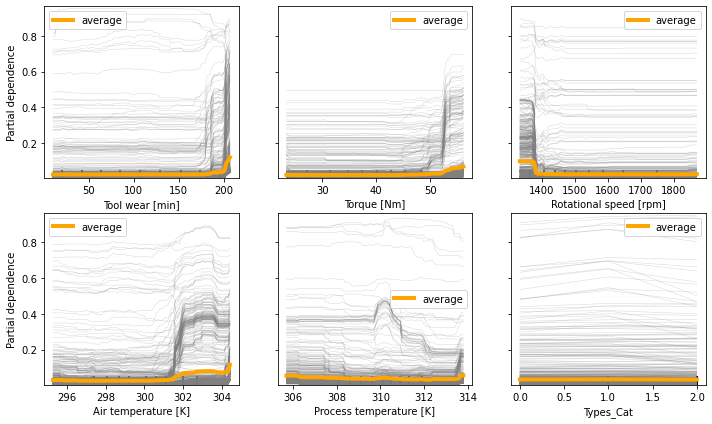

In [52]:
#ICE
fig, ax = plt.subplots(figsize=(10, 6))
ice = PartialDependenceDisplay.from_estimator(estimator=rf,
                        X=X_train,
                        features=[0,1,2,3,4,5],
                        kind="both",
                        ice_lines_kw={"color":"#808080","alpha": 0.3, "linewidth": 0.5},
                        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha":1},
                        # centered=True, # will be added in the future
                        ax=ax)
fig.tight_layout(pad=2.0)

## Accumulated Local Effects

PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03311


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.


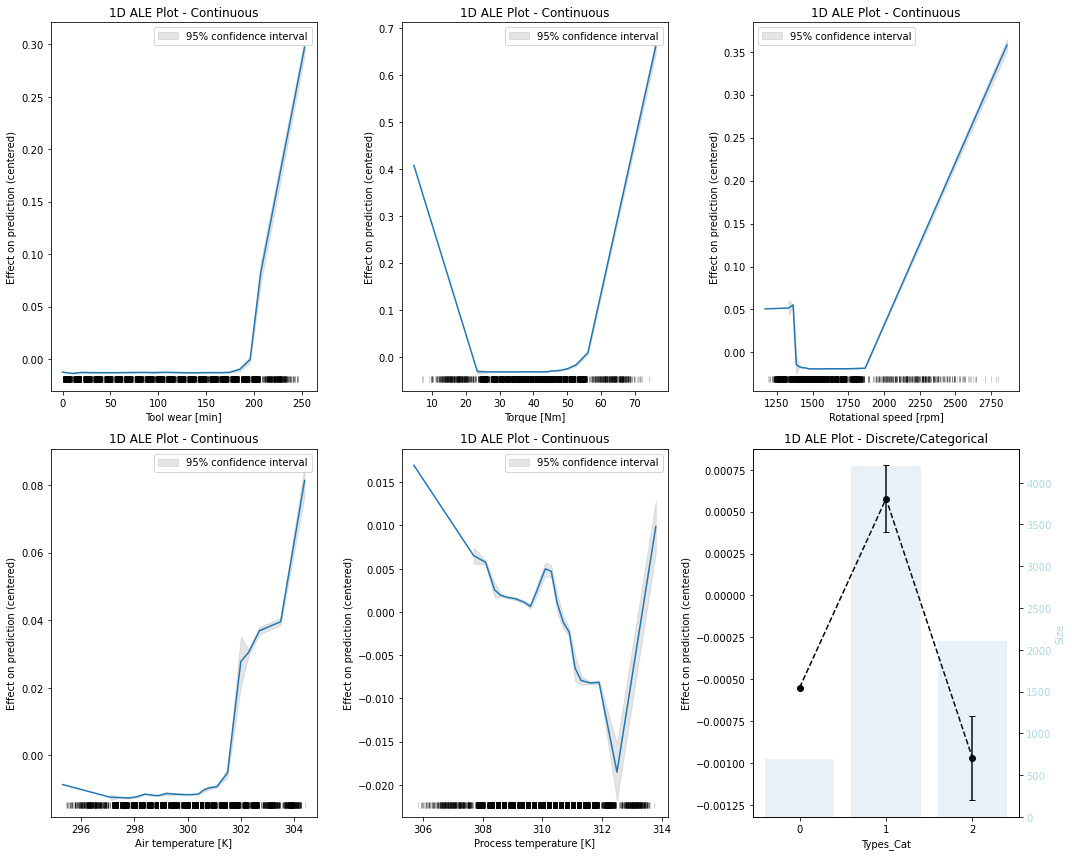

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.tight_layout(pad=3)


ale_tool_wear = ale(
        X=X_train,
        model=rf,
        feature=['Tool wear [min]'],
        include_CI=True,
        target=i,
        fig=fig,
        ax=axs[0,0], print_meanres=True)

ale_torque = ale(
        X=X_train,
        model=rf,
        feature=["Torque [Nm]"],
        include_CI=True,
        target=i,
        fig=fig,
        ax=axs[0,1])

ale_speed = ale(
        X=X_train,
        model=rf,
        feature=["Rotational speed [rpm]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[0,2])

ale_air = ale(
        X=X_train,
        model=rf,
        feature=["Air temperature [K]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,0])

ale_process = ale(
        X=X_train,
        model=rf,
        feature=["Process temperature [K]"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,1])

ale_Cat = ale(
        X=X_train,
        model=rf,
        feature=["Types_Cat"],
        include_CI=True,
        target=i, 
        fig=fig,
        ax=axs[1,2])


## Shapley Values

In [54]:
# set up explainer for ".predict" method
explainer = shap.Explainer(rf.predict, X_test)

# compute shap values
shap_values = explainer(X_test)

Exact explainer: 3001it [04:33, 10.55it/s]                                                                             


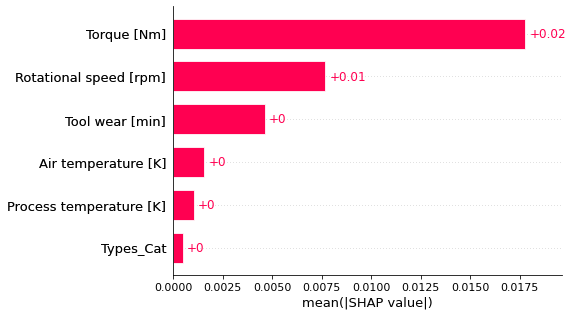

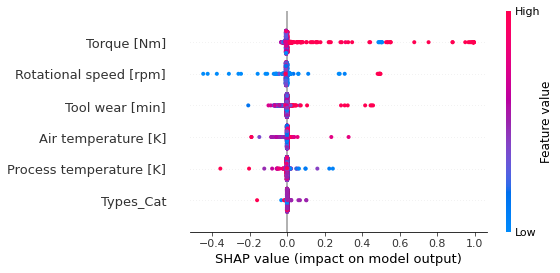

In [55]:
# feature importance (global)

# bar chart
shap.plots.bar(shap_values)

# individual dots for each instance
shap.plots.beeswarm(shap_values)